In [12]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import math
import soundfile as sf
import scipy.signal
# import torch 
import scipy
from scipy import signal
import import_ipynb

In [14]:
from griffinlim import STFT

ImportError: cannot import name 'STFT' from 'griffinlim' (griffinlim.ipynb)

In [15]:
### from griffinlim.py

def lib_STFT(sig, L, S):

    N = int(len(sig))
    M = int(N/S)
    window = scipy.signal.get_window('hamming',L)
    print(window)
    
    array_exp = []
    for k in range(0, N,1):
        globals()['exp{}'.format(k)] = []
   
        for l in range(0, N,1):

            value = (((2*np.pi)*k*l)/N )*1j
            exp = np.exp(value)
            globals()['exp{}'.format(k)].append(exp)
         
        array_exp.append(globals()['exp{}'.format(k)])
    array_exp = np.array(array_exp)
    array_exp = array_exp.T
    
    
    STFT = []
    for m in range(0,M-1,1):
        print(m)
        data_list = []
        for l in range(0,N,1):
            
            if ((m*S+l) > l) or ((m*S+l) >= S*(m+1)):
                zero_window = 0
                data = zero_window
                    
            else:
                print(l,l-S*m)
                data = sig[l] * window[l-S*m]
                
            data_list.append(data)
           
        data_list = np.array(data_list)
        print(data_list.shape) 
        F = data_list @ array_exp
        STFT.append(F)

    STFT = np.array(STFT)
    
    return STFT


In [16]:
### from griffinlim.py

def STFT(sig, L, S):
    window = scipy.signal.get_window('hamming',L)
    N = int(len(sig))
    M = int(N/S)
    array_exp = []
    for k in range(0, N,1):
        globals()['exp{}'.format(k)] = []
   
        for l in range(0, N,1):

            value = (((2*np.pi)*k*l)/N )*1j
            exp = np.exp(value)
            globals()['exp{}'.format(k)].append(exp)
         
        array_exp.append(globals()['exp{}'.format(k)])
    array_exp = np.array(array_exp)
    array_exp = array_exp.T
    
    
    STFT = []
    for m in range(1,M+1,1):

        data_list = []
        for l in range(0,N,1):
        
            if ((m*S-l)>= 0) and ((m*S-l) <= (L-1)):
                data = sig[l]*window[m*S-l]
                
            else:
                zero_window = 0
                data = sig[l] * zero_window
        

            data_list.append(data)
    
  
        F = data_list @ array_exp
        STFT.append(F)

    STFT = np.array(STFT)
    
    return STFT


32


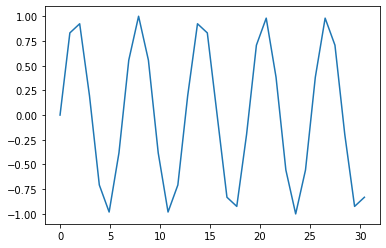

In [17]:
t = np.linspace(0, 10*np.pi,33)[:-1]
sin = np.sin(t)
plt.plot(t,sin)
print(len(sin))

In [30]:
S = STFT(sin, 8, 4)
librosa_S = librosa.stft(sin, n_fft=32, hop_length=4, win_length=8, window='hamming')

In [31]:
print( S.shape, librosa_S.shape)

(8, 32) (17, 9)


In [28]:
L = 8
S = 4
N = 32
M = int(N/S)

for m in range(1,M+1,1):

    
    for l in range(0,N,1):
        
        
        if ((m*S-l)>= 0) and ((m*S-l) <= (L-1)):
            print("data exist m*S-l=", m*S-l)
                
        else:
            print("data not exist." , m*S-l)

  



data exist m*S-l= 4
data exist m*S-l= 3
data exist m*S-l= 2
data exist m*S-l= 1
data exist m*S-l= 0
data not exist. -1
data not exist. -2
data not exist. -3
data not exist. -4
data not exist. -5
data not exist. -6
data not exist. -7
data not exist. -8
data not exist. -9
data not exist. -10
data not exist. -11
data not exist. -12
data not exist. -13
data not exist. -14
data not exist. -15
data not exist. -16
data not exist. -17
data not exist. -18
data not exist. -19
data not exist. -20
data not exist. -21
data not exist. -22
data not exist. -23
data not exist. -24
data not exist. -25
data not exist. -26
data not exist. -27
data not exist. 8
data exist m*S-l= 7
data exist m*S-l= 6
data exist m*S-l= 5
data exist m*S-l= 4
data exist m*S-l= 3
data exist m*S-l= 2
data exist m*S-l= 1
data exist m*S-l= 0
data not exist. -1
data not exist. -2
data not exist. -3
data not exist. -4
data not exist. -5
data not exist. -6
data not exist. -7
data not exist. -8
data not exist. -9
data not exist. -10
